In [2]:
import tensorflow
from tensorflow import keras

import pandas as pd
import numpy as np

In [3]:
dset= pd.read_csv("cardio_train.csv")

In [4]:
dset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = dset.drop(["id"], axis=1)

In [6]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.isnull().any()

age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [8]:
pd.isnull(data).values.any(), pd.isnull(data).values.sum()

(False, 0)

In [9]:
# split dataset into x - independent variable and y = dependent variable
X = data.drop(['cardio'], axis=1)
y = data.iloc[:, -1]

In [10]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [11]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

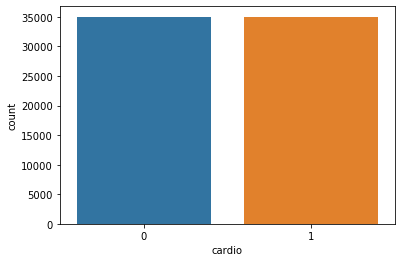

In [12]:
import seaborn as sns
sns.countplot(data['cardio'])

In [13]:
# split the dataset into traning and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
# standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[ 1.30143459, -0.73465533,  0.81166962, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [-1.59179708,  1.36118253,  1.05637254, ...,  3.20138285,
        -0.23953913, -2.02142356],
       [ 1.29493386,  1.36118253,  0.32226377, ..., -0.31236501,
        -0.23953913,  0.49470087],
       ...,
       [ 1.17873329,  1.36118253,  1.17872401, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [-0.47245243, -0.73465533, -1.39065672, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [ 0.38198743,  1.36118253,  0.56696669, ..., -0.31236501,
        -0.23953913,  0.49470087]])

In [16]:
X_test

array([[-1.73400057, -0.73465533,  0.07756084, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [ 0.13455334, -0.73465533, -0.04479062, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [ 0.43846253, -0.73465533,  0.68931815, ..., -0.31236501,
        -0.23953913,  0.49470087],
       ...,
       [-0.49520499, -0.73465533, -0.41184501, ..., -0.31236501,
        -0.23953913, -2.02142356],
       [ 0.09311118,  1.36118253,  0.56696669, ..., -0.31236501,
        -0.23953913,  0.49470087],
       [-2.02978384, -0.73465533,  0.07756084, ..., -0.31236501,
        -0.23953913,  0.49470087]])

In [17]:
# bulding the classification model
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation="relu", input_dim=11, kernel_initializer="uniform")),
model.add(keras.layers.Dense(13, activation="relu", kernel_initializer="uniform")),
model.add(keras.layers.Dense(1, activation="sigmoid", kernel_initializer="uniform")),

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])

In [18]:
# fitting the model
model.fit(X_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
6125/6125 [==============================] - 3s 564us/step - loss: 0.5772 - accuracy: 0.7146
Epoch 2/100
6125/6125 [==============================] - 3s 569us/step - loss: 0.5598 - accuracy: 0.7262
Epoch 3/100
6125/6125 [==============================] - 4s 700us/step - loss: 0.5540 - accuracy: 0.7295
Epoch 4/100
6125/6125 [==============================] - 4s 706us/step - loss: 0.5505 - accuracy: 0.7305
Epoch 5/100
6125/6125 [==============================] - 4s 696us/step - loss: 0.5482 - accuracy: 0.7314
Epoch 6/100
6125/6125 [==============================] - 4s 705us/step - loss: 0.5472 - accuracy: 0.7322
Epoch 7/100
6125/6125 [==============================] - 4s 719us/step - loss: 0.5464 - accuracy: 0.7324
Epoch 8/100
6125/6125 [==============================] - 4s 710us/step - loss: 0.5456 - accuracy: 0.7333
Epoch 9/100
6125/6125 [==============================] - 4s 734us/step - loss: 0.5446 - accuracy: 0.7333
Epoch 10/100
6125/6125 [==============================]

6125/6125 [==============================] - 5s 771us/step - loss: 0.5404 - accuracy: 0.7359
Epoch 79/100
6125/6125 [==============================] - 5s 767us/step - loss: 0.5404 - accuracy: 0.7351
Epoch 80/100
6125/6125 [==============================] - 5s 783us/step - loss: 0.5408 - accuracy: 0.7353
Epoch 81/100
6125/6125 [==============================] - 5s 784us/step - loss: 0.5405 - accuracy: 0.7343
Epoch 82/100
6125/6125 [==============================] - 5s 788us/step - loss: 0.5407 - accuracy: 0.7351
Epoch 83/100
6125/6125 [==============================] - 5s 768us/step - loss: 0.5403 - accuracy: 0.7360
Epoch 84/100
6125/6125 [==============================] - 5s 797us/step - loss: 0.5403 - accuracy: 0.7349
Epoch 85/100
6125/6125 [==============================] - 5s 800us/step - loss: 0.5404 - accuracy: 0.7349
Epoch 86/100
6125/6125 [==============================] - 5s 811us/step - loss: 0.5405 - accuracy: 0.7352
Epoch 87/100
6125/6125 [==============================] - 5

In [19]:
# prediction and rescaling
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [20]:
# confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix

array([[8019, 2520],
       [3074, 7387]], dtype=int64)

In [21]:
# accuracy
scores = model.evaluate(X,y)
# print(model.metrics_names[1], scores[1]*100)
scores

2188/2188 [==============================] - 1s 467us/step - loss: 1581.2832 - accuracy: 0.4997


[1581.283203125, 0.49970000982284546]

In [22]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy", accuracy*100)

Accuracy 73.36190476190477
